In [106]:
#Opened with --pylab flag
#Need to create code to analyze piot data
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [107]:
# Change this depending on computer used for analysis
## Laptop
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData'
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData/test3s'
#filepath = '/Users/frankkanayet/Google Drive/NLineData/Beh_Data'

## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data'
os.chdir(filepath)

In [108]:
print 'Pandas version ' + pd.__version__

Pandas version 0.16.2


In [109]:
filenames = glob.glob('Nline_*.mat')
print filenames
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = filenames[0].find('_') + 1
    id2 = filenames[0].find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
data_dict.keys()

['Nline_02001-Mar1615.mat', 'Nline_02002-Mar1915.mat', 'Nline_02003-Mar2015a.mat', 'Nline_02004-Mar2315a.mat', 'Nline_02005-Mar2315a.mat', 'Nline_02006-Mar2315a.mat', 'Nline_02007-Mar2415a.mat', 'Nline_02009-Mar2615a.mat', 'Nline_02010-Mar2615a.mat', 'Nline_02011-Mar2615a.mat', 'Nline_02012-Apr0215a.mat', 'Nline_02014-Apr0315a.mat', 'Nline_02015Apr2715a.mat', 'Nline_02016-Apr2715a.mat', 'Nline_02017-Apr2815a.mat', 'Nline_02018-Apr2815a.mat', 'Nline_02019-Apr2915a.mat', 'Nline_02020-May1815a.mat', 'Nline_02021-May2515a.mat', 'Nline_02022-May2515a.mat', 'Nline_02023-May2715a.mat', 'Nline_02024-May2815a.mat', 'Nline_02027-Jun0115a.mat']


['s_02009',
 's_02003',
 's_02002',
 's_02001',
 's_02007',
 's_02006',
 's_02005',
 's_02004',
 's_02018',
 's_02019',
 's_02010',
 's_02011',
 's_02012',
 's_02014',
 's_02015',
 's_02016',
 's_02017',
 's_02024',
 's_02027',
 's_02021',
 's_02020',
 's_02023',
 's_02022']

In [110]:
sub_ex = data_dict.keys()[0]

In [111]:
#data_dict['s_00011']['p']

In [112]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [113]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
data_dict[sub_ex]['p']['NlineResults'][0][0][0][5][0][0]
len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

49

In [114]:
data_dict[sub_ex]['p'].dtype.names

('ramp_up',
 'Mean_ITI',
 'Mean_hold',
 'decision',
 'consider',
 'runs',
 'nStim',
 'ntasks',
 'tasks',
 'trialSecs',
 'lineLength',
 'speed',
 'run_order',
 'NlineResults',
 'time_Runs',
 'task_transition',
 'start_Nline',
 'finish_Nline')

In [115]:
#Comment this out for include all subjects
data_dict.pop('s_02012')
data_dict.pop('s_02001')
data_dict.pop('s_02002')
data_dict.pop('s_02019')
data_dict.pop('s_02017')

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Apr 28 14:26:09 2015',
 '__version__': '1.0',
 'p': array([[ ([[14]], [[4.5]], [[4]], [[3]], [[0.5]], [[4]], [[16]], [[3]], [[array([u'Nline'], 
       dtype='<U5'), array([u'Negline'], 
       dtype='<U7'), array([u'Control'], 
       dtype='<U7')]], [[12]], [[1500]], [[6]], [[2, 1, 3], [1, 2, 3], [2, 3, 1], [3, 2, 1]], [[[array([u'Task'], 
       dtype='<U4'), array([u'Task'], 
       dtype='<U4'), array([u'Task'], 
       dtype='<U4'), array([u'Task'], 
       dtype='<U4')], [array([u'Probe'], 
       dtype='<U5'), array([u'Probe'], 
       dtype='<U5'), array([u'Probe'], 
       dtype='<U5'), array([u'Probe'], 
       dtype='<U5')], [array([u'Line_pct'], 
       dtype='<U8'), array([u'Line_pct'], 
       dtype='<U8'), array([u'Line_pct'], 
       dtype='<U8'), array([u'Line_pct'], 
       dtype='<U8')], [array([u'catch'], 
       dtype='<U5'), array([u'catch'], 
       dtype='<U5'), array([u'

In [116]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [117]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'Run_'+str(run)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [118]:
#new_dat[sub_ex]['NlineResults']['Run_1'].keys()

In [119]:
#new_dat[sub_ex]['NlineResults']['Run_1']['Probe']

In [120]:
#new_dat[sub_ex]['NlineResults']['Run_1']['catch_probe']

In [121]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['Run_0'].keys())

In [122]:
#indexes[90]

In [123]:
#indexes[1][1]

In [124]:
varnames = new_dat[sub_ex][Nline]['Run_0'].keys()
#varnames[24]

In [125]:
#len(indexes)

In [126]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if var == probes[0]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
        else:
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
    Dic_list.append(temp_dict)

In [127]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
sum(nline_df.loc[sub_ex].loc['Run_0'].iloc[0:48]['catch'])

12

In [128]:
#nline_df.loc[sub_ex].loc['Run_0'].iloc[0:10]['Error']

In [129]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
#nline_df.index.names

In [130]:
test = nline_df['Probe']
for i in range(0,len(test)):
    test[i] = np.ravel(test[i])
    test[i] = test[i][0]
nline_df['Probe'] = test
nline_df['Probe']

/Users/frankanayet/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/frankanayet/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Subject  Run    Trial
s_02009  Run_3  0        -44
                1         80
                2        -10
                3         14
                4         48
                5        -86
                6         54
                7        -94
                8        -58
                9         30
                10       -34
                11        70
                12       -78
                13        20
                14       -28
                15        96
                16        if
                17        or
                18        ox
                19        of
                20        we
                21        as
                22        do
                23        it
                24        am
                25        so
                26        is
                27        be
                28        by
                29        my
                        ... 
s_02022  Run_0  18        is
                19        my
                20   

### Create Stim Labels

In [131]:
#now nline
#nline_df['Num'] = nline_df['Num'].map('{:.0f}'.format)
#nline_df['Denom'] = nline_df['Denom'].map('{:.0f}'.format)
#nline_df['Stim'] = nline_df['Num']+'/'+nline_df['Denom']
#nline_df['Stim']

In [132]:
nline_df.columns

Index([           u'BadPress',               u'Block',               u'Click',
                   u'Correct',               u'Error',           u'ITI_onset',
            u'ITI_onset_real',            u'Line_pct',                u'Move',
                    u'Points',               u'Probe',                  u'RT',
                    u'RTHold',            u'Response',                u'Slow',
                      u'Task',               u'TestX',               u'Trial',
                     u'Wrong',               u'catch',         u'catch_probe',
            u'consider_onset', u'consider_onset_real',        u'decision_end',
         u'decision_end_real',      u'decision_onset', u'decision_onset_real',
                      u'hold',          u'hold_onset',     u'hold_onset_real',
                       u'iti',           u'mouse_pos'],
      dtype='object')

# Number Line Analyses

### Accuracy & RT

In [133]:
#nline_df['catch'].sum()

In [134]:
nline_no_miss = nline_df[['Error', 'RT', 'RTHold', 'catch']]
nline_no_miss = nline_no_miss[nline_no_miss['catch']<1]
#len(nline_no_miss)

In [135]:
nline_no_miss = nline_no_miss.replace(-1, np.nan)
nline_no_miss.pop('catch')

Subject  Run    Trial
s_02009  Run_3  1        0
                2        0
                3        0
                5        0
                6        0
                7        0
                8        0
                9        0
                11       0
                12       0
                13       0
                15       0
                17       0
                18       0
                19       0
                20       0
                21       0
                22       0
                24       0
                26       0
                27       0
                29       0
                30       0
                31       0
                32       0
                34       0
                35       0
                37       0
                38       0
                39       0
                        ..
s_02022  Run_0  8        0
                9        0
                10       0
                11       0
                14       0
      

In [136]:
nline_no_miss['Missed'] = nline_no_miss['Error']
nline_no_miss['Missed'][nline_no_miss['Missed']<1] = 0
nline_missed = nline_no_miss['Missed']
#nline_missed

In [137]:
nline_no_miss = nline_no_miss[nline_no_miss['Error']<1]
nline_no_miss['AbsError'] = np.abs(nline_no_miss['Error'])
#nline_no_miss

## How many trials missed?

In [138]:
nline_missed_subj = nline_missed.groupby(level=0)
nline_missed_subj.sum()

Subject
s_02003     7
s_02004     3
s_02005    17
s_02006     2
s_02007     1
s_02009     1
s_02010     7
s_02011     7
s_02014     7
s_02015     6
s_02016    10
s_02018     4
s_02020    12
s_02021     5
s_02022    18
s_02023     5
s_02024    10
s_02027     6
Name: Missed, dtype: float64

##Subject Averages

In [139]:
nline_no_miss_subj = nline_no_miss.groupby(level=0)
nline_no_miss_subj.mean()

,Error,RT,RTHold,Missed,AbsError
Subject,,,,,
s_02003,0.002544,2.240014,0.480898,0,0.022472
s_02004,0.000621,2.181841,0.390107,0,0.020997
s_02005,-0.004826,2.378822,0.468106,0,0.021902
s_02006,-0.000487,1.970216,0.422093,0,0.026771
s_02007,-0.009034,2.117213,0.430258,0,0.027687
s_02009,-0.003768,2.240575,0.499304,0,0.019800
s_02010,-0.003834,1.801020,0.402272,0,0.034298
s_02011,0.005220,2.177101,0.512704,0,0.031181
s_02014,0.000828,2.200079,0.485166,0,0.033909


##Overall Averages

In [35]:
np.mean(nline_no_miss_subj.mean())

Error      -0.002280
RT          2.159062
RTHold      0.469918
Missed      0.000000
AbsError    0.027157
dtype: float64

##Subject Standard Deviations

In [141]:
nline_no_miss_subj.std()

,Error,RT,RTHold,Missed,AbsError
Subject,,,,,
s_02003,0.031955,0.366943,0.082894,0,0.022780
s_02004,0.030748,0.325082,0.097012,0,0.022400
s_02005,0.038741,0.317196,0.092952,0,0.032262
s_02006,0.049819,0.345187,0.135683,0,0.041957
s_02007,0.086780,0.252646,0.106627,0,0.082710
s_02009,0.029847,0.332101,0.105460,0,0.022590
s_02010,0.056356,0.358041,0.100827,0,0.044786
s_02011,0.042060,0.320319,0.120519,0,0.028585
s_02014,0.064016,0.310836,0.128126,0,0.054226


##Overall Standard Deviation

In [142]:
np.mean(nline_no_miss_subj.std())

Error       0.047336
RT          0.333021
RTHold      0.120088
Missed      0.000000
AbsError    0.038858
dtype: float64

How many trials did they actually respond?

In [143]:
nline_no_miss_subj.count()

,Error,RT,RTHold,Missed,AbsError
Subject,,,,,
s_02003,137,137,137,137,137
s_02004,141,141,141,141,141
s_02005,127,127,127,127,127
s_02006,142,142,142,142,142
s_02007,143,143,143,143,143
s_02009,143,143,143,143,143
s_02010,137,137,137,137,137
s_02011,137,137,137,137,137
s_02014,137,137,137,137,137


# RT Histograms

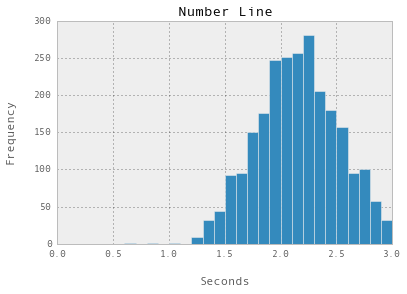

In [146]:
pd.options.display.mpl_style = 'default'
nline_no_miss['RT'].hist(bins=30, range=[0,3])
plt.ylim([0,300])
plt.title('Number Line')
plt.xlabel('Seconds', labelpad = 18)
plt.ylabel('Frequency', labelpad = 18)

## RTHold missed analysis

In [147]:
nline_miss = nline_df[['Error', 'RT', 'RTHold', 'catch', 'Task', 'Line_pct']]
nline_miss = nline_miss[nline_miss['catch']<1]
#len(nline_miss)

In [148]:
nline_miss['Missed'] = nline_miss['Error']
nline_miss['Missed'][nline_miss['Missed']<1] = 0
#nline_miss

/Users/frankanayet/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [149]:
nline_miss['AbsError'] = np.abs(nline_miss['Error'])

In [150]:
responded = nline_miss[nline_miss['Missed']==0]
#responded['Error'] = np.abs(responded['Error'])
#len(responded)

In [151]:
nline_miss = nline_miss[nline_miss['Missed']==1]
#nline_miss

##RTHold Subject Average

In [152]:
nline_miss_subj = nline_miss.groupby(level=0)
nline_miss_subj.mean()

,Error,RT,RTHold,catch,Task,Line_pct,Missed,AbsError
Subject,,,,,,,,
s_02003,1,-1,0.580029,0,2.428571,0.504286,1,1
s_02004,1,-1,0.371789,0,2.333333,0.513333,1,1
s_02005,1,-1,0.523442,0,1.882353,0.414118,1,1
s_02006,1,-1,0.318201,0,2.000000,0.315000,1,1
s_02007,1,-1,0.446265,0,1.000000,0.850000,1,1
s_02009,1,-1,0.596069,0,2.000000,0.070000,1,1
s_02010,1,-1,0.617966,0,2.142857,0.568571,1,1
s_02011,1,-1,0.586275,0,2.285714,0.555714,1,1
s_02014,1,-1,0.439934,0,2.000000,0.388571,1,1


##RTHold Overall Average

In [154]:
np.mean(nline_miss_subj.mean())

Error       1.000000
RT         -1.000000
RTHold      0.634727
catch       0.000000
Task        1.998491
Line_pct    0.467672
Missed      1.000000
AbsError    1.000000
dtype: float64

##Averages by subjected for responded trials

In [156]:
responded_subj = responded.groupby(level=0)
responded_subj.mean()

,Error,RT,RTHold,catch,Task,Line_pct,Missed,AbsError
Subject,,,,,,,,
s_02003,0.002544,2.240014,0.480898,0,1.978102,0.493212,0,0.022472
s_02004,0.000621,2.181841,0.390107,0,1.992908,0.493333,0,0.020997
s_02005,-0.004826,2.378822,0.468106,0,2.015748,0.504409,0,0.021902
s_02006,-0.000487,1.970216,0.422093,0,2.000000,0.496268,0,0.026771
s_02007,-0.009034,2.117213,0.430258,0,2.006993,0.491259,0,0.027687
s_02009,-0.003768,2.240575,0.499304,0,2.000000,0.496713,0,0.019800
s_02010,-0.003834,1.801020,0.402272,0,1.992701,0.489927,0,0.034298
s_02011,0.005220,2.177101,0.512704,0,1.985401,0.490584,0,0.031181
s_02014,0.000828,2.200079,0.485166,0,2.000000,0.499124,0,0.033909


##Overall Averages

In [157]:
np.mean(responded_subj.mean())

Error      -0.001894
RT          2.155551
RTHold      0.475796
catch       0.000000
Task        1.999762
Line_pct    0.493895
Missed      0.000000
AbsError    0.026046
dtype: float64

In [158]:
responded['RT_Diff'] = responded['RT']-responded['RTHold']

##RT Differences is the new informaiton here

In [159]:
responded_subj = responded.groupby(level=0)
responded_subj.mean()

,Error,RT,RTHold,catch,Task,Line_pct,Missed,AbsError,RT_Diff
Subject,,,,,,,,,
s_02003,0.002544,2.240014,0.480898,0,1.978102,0.493212,0,0.022472,1.759116
s_02004,0.000621,2.181841,0.390107,0,1.992908,0.493333,0,0.020997,1.791734
s_02005,-0.004826,2.378822,0.468106,0,2.015748,0.504409,0,0.021902,1.910716
s_02006,-0.000487,1.970216,0.422093,0,2.000000,0.496268,0,0.026771,1.548123
s_02007,-0.009034,2.117213,0.430258,0,2.006993,0.491259,0,0.027687,1.686955
s_02009,-0.003768,2.240575,0.499304,0,2.000000,0.496713,0,0.019800,1.741271
s_02010,-0.003834,1.801020,0.402272,0,1.992701,0.489927,0,0.034298,1.398747
s_02011,0.005220,2.177101,0.512704,0,1.985401,0.490584,0,0.031181,1.664397
s_02014,0.000828,2.200079,0.485166,0,2.000000,0.499124,0,0.033909,1.714912


## Plots by position

In [160]:
position_tasks = responded.groupby(['Task', 'Line_pct'])

In [161]:
#responded.iloc[0:20]

##RTs by position averages

In [162]:
position_tasks['RT'].mean()

Task  Line_pct
1     0.03        2.166232
      0.07        2.252974
      0.11        2.251930
      0.21        2.236069
      0.28        2.250295
      0.33        2.102950
      0.36        2.194441
      0.45        1.835135
      0.57        1.943075
      0.60        1.965550
      0.65        2.005734
      0.74        2.181136
      0.77        2.239934
      0.85        2.345485
      0.90        2.307132
      0.98        2.210749
2     0.03        2.277682
      0.07        2.307971
      0.11        2.322347
      0.21        2.222244
      0.28        2.171832
      0.33        2.133167
      0.36        2.032535
      0.45        1.874872
      0.57        1.964878
      0.60        2.029661
      0.65        1.987113
      0.74        2.239032
      0.77        2.239711
      0.85        2.308307
      0.90        2.353920
      0.98        2.221245
3     0.03        2.283034
      0.07        2.322188
      0.11        2.307128
      0.21        2.249980
      0.28   

In [163]:
rts = position_tasks['RT'].mean()

In [164]:
error = position_tasks['AbsError'].mean()

In [165]:
#rts.iloc[10]

In [166]:
rts_1 = rts.iloc[0:16]
rts_2 = rts.iloc[16:32]
rts_3 = rts.iloc[32:48]
#rts_1 = rts.iloc[0:14]
#rts_2 = rts.iloc[14:30]
#rts_3 = rts.iloc[30:46]

In [167]:
error_1 = error.iloc[0:16]
error_2 = error.iloc[16:32]
error_3 = error.iloc[32:48]
#error_1 = error.iloc[0:14]
#error_2 = error.iloc[14:30]
#error_3 = error.iloc[30:46]

In [168]:
rts_1 = rts_1.get_values()
rts_2 = rts_2.get_values()
rts_3 = rts_3.get_values()

In [169]:
error_1 = error_1.get_values()
error_2 = error_2.get_values()
error_3 = error_3.get_values()

In [170]:
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
len(rts_1)
xvals1 = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.900, 0.980])

In [171]:
#len(rts_3)

([<matplotlib.axis.YTick at 0x10d4f70d0>,
 <a list of 3 Text yticklabel objects>)

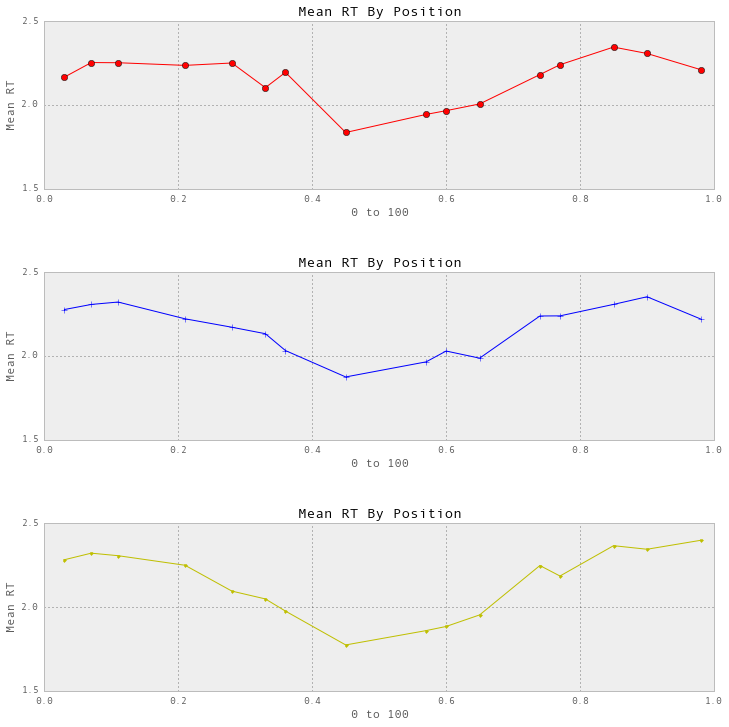

In [172]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, rts_1, 'ro-')
plt.title('Mean RT By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, rts_2, 'b+-')
plt.title('Mean RT By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, rts_3, 'y.-')
plt.title('Mean RT By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

#plt.subplots_adjust(hspace = 1.1)

([<matplotlib.axis.YTick at 0x10f63a750>,
 <a list of 4 Text yticklabel objects>)

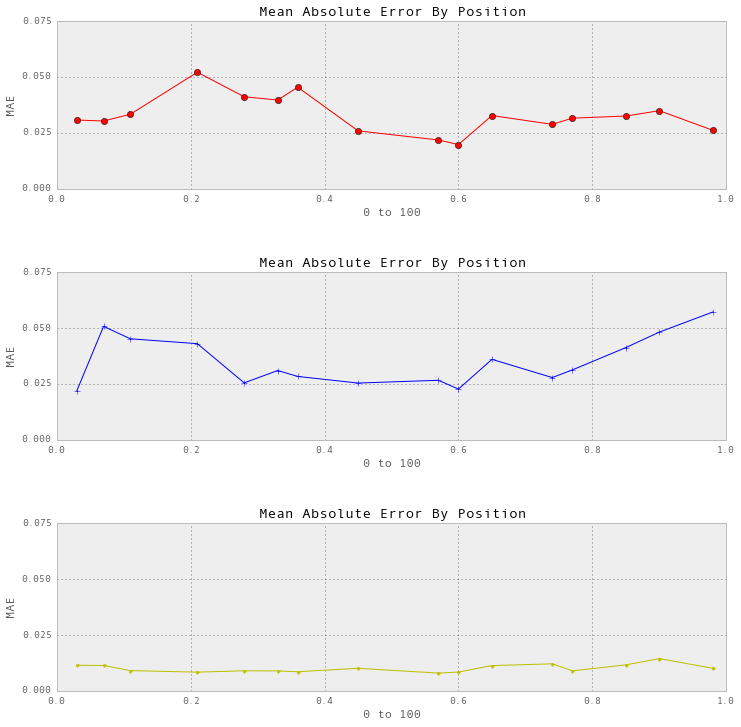

In [173]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, error_1, 'ro-')
plt.title('Mean Absolute Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, error_2, 'b+-')
plt.title('Mean Absolute Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, error_3, 'y.-')
plt.title('Mean Absolute Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))


###Signed error is calculated as Response - Correct

In [174]:
signerror = position_tasks['Error'].mean()
STDsignerror = position_tasks['Error'].std()
signerror_1 = signerror.iloc[0:16]
signerror_2 = signerror.iloc[16:32]
signerror_3 = signerror.iloc[32:48]
STDsignerror_1 = STDsignerror.iloc[0:16]
STDsignerror_2 = STDsignerror.iloc[16:32]
STDsignerror_3 = STDsignerror.iloc[32:48]
signerror_1 = signerror_1.get_values()
signerror_2 = signerror_2.get_values()
signerror_3 = signerror_3.get_values()
STDsignerror_1 = STDsignerror_1.get_values()
STDsignerror_2 = STDsignerror_2.get_values()
STDsignerror_3 = STDsignerror_3.get_values()

([<matplotlib.axis.YTick at 0x110a965d0>,
 <a list of 5 Text yticklabel objects>)

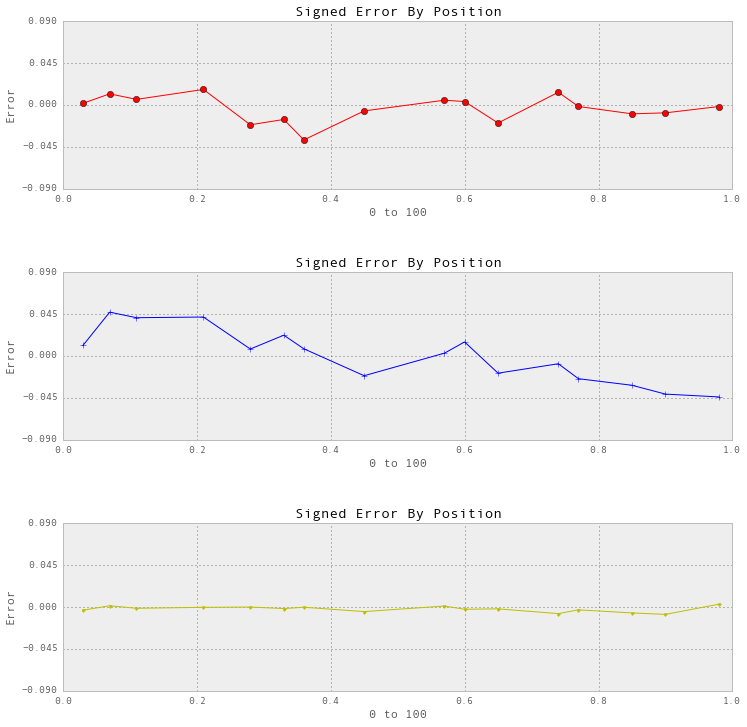

In [175]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, signerror_1, 'ro-')
plt.title('Signed Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, signerror_2, 'b+-')
plt.title('Signed Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, signerror_3, 'y.-')
plt.title('Signed Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

## Positive values in the graph above mean participant overestimated, negative values mean participant underestimated. In the -/+ task participants tend to give answers further from the endpoints than they should (This might have to do with the fact that the line is divided in 200 units unlike + task).

([<matplotlib.axis.YTick at 0x119460f90>,
 <a list of 5 Text yticklabel objects>)

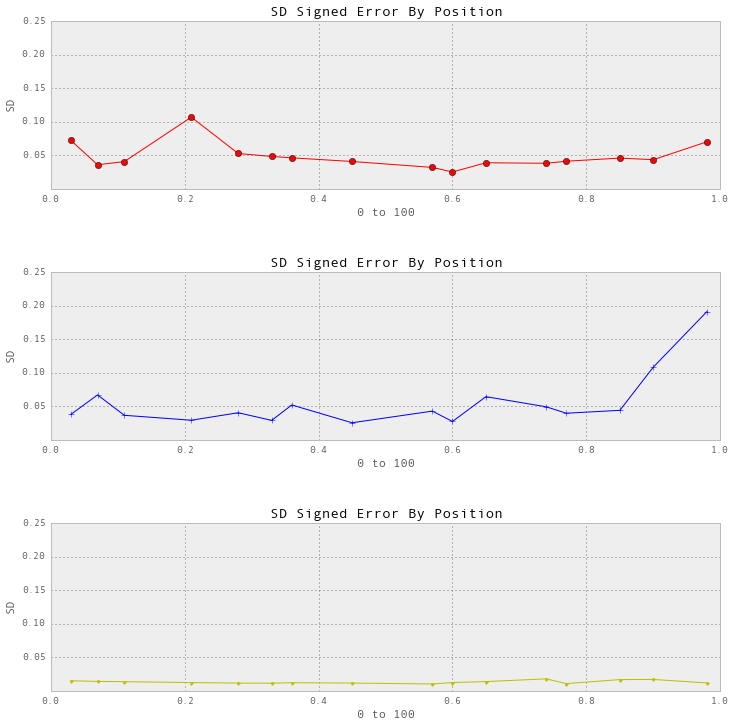

In [176]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, STDsignerror_1, 'ro-')
plt.title('SD Signed Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.25])
plt.yticks(([0.05,0.1,0.15,0.2,0.25]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, STDsignerror_2, 'b+-')
plt.title('SD Signed Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.25])
plt.yticks(([0.05,0.1,0.15,0.2,0.25]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, STDsignerror_3, 'y.-')
plt.title('SD Signed Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.25])
plt.yticks(([0.05,0.1,0.15,0.2,0.25]))

In [177]:
#Basis to extract SD for each subject and then conduct average across subjects
position_tasks.get_group((1,0.03)).loc['s_02009']['Error'].std()

0.010173573025367855

In [178]:
D = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = []
        D[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].std())

In [179]:
for task in D:
    print task
    for stim in D[task]:
        D[task][stim] = np.nanmean(D[task][stim])

1
2
3


In [180]:
STDsignerror_1 = []
STDsignerror_2 = []
STDsignerror_3 = []
for stim in D[1]:
    STDsignerror_1.append(D[1][stim])
for stim in D[2]:
    STDsignerror_2.append(D[2][stim])
for stim in D[3]:
    STDsignerror_3.append(D[3][stim])

([<matplotlib.axis.YTick at 0x11b6caf90>,
 <a list of 3 Text yticklabel objects>)

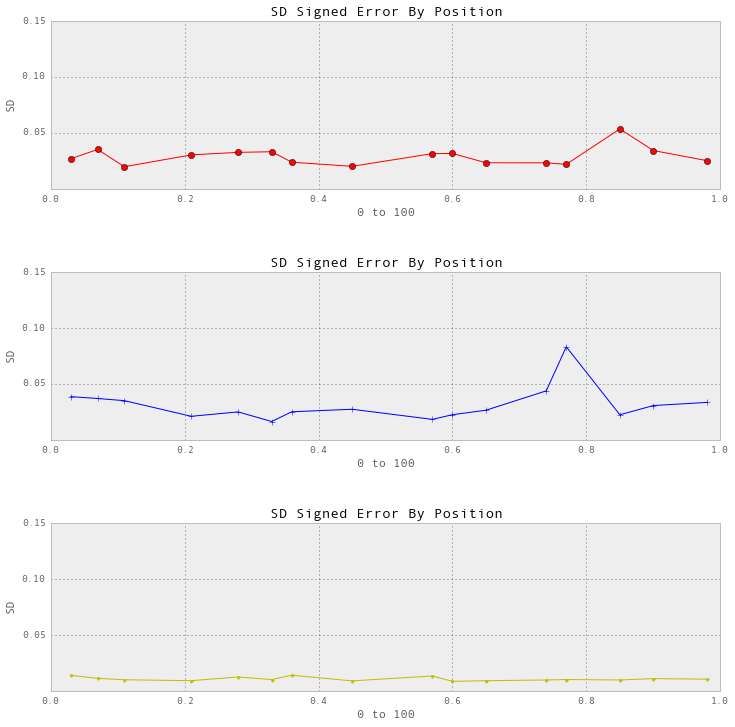

In [181]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, STDsignerror_1, 'ro-')
plt.title('SD Signed Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, STDsignerror_2, 'b+-')
plt.title('SD Signed Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, STDsignerror_3, 'y.-')
plt.title('SD Signed Error By Position')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

In [182]:
D2 = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D2.get(task,0) == 0:
            D2[task] = {}
        if D2[task].get(stim,0) == 0:
            D2[task][stim] = []
        D2[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].mean())